### NN implementation

In [2]:
# Helpers fcts.
def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_multiclass_loss(y, y_fwrd):
    l_sum = np.sum(np.multiply(y, np.log(y_fwrd)))
    m = y.shape[1]
    loss = -(1/m) * l_sum
    return loss

def precision(y, y_fwrd):
    n = y.shape[1]
    return np.sum([np.argmax(y_fwrd[:,i]) == np.argmax(y[:,i]) for i in range(n)]) / n



class NeuralNetwork:
    """ 
        Standard, feed forward NN's implementation
    """
    def __init__(self, X, y, n_h):
        self.n_x = X.shape[0]
        self.w1 = np.random.randn(n_h, self.n_x)
        self.b1 = np.zeros((n_h, 1))
        self.n_y = y.shape[0]
        self.w2 = np.random.randn(self.n_y, n_h)
        self.b2 = np.zeros((self.n_y, 1))    

    def train(self, X, y, learn_rate=1):
        
        # feed forward
        z1 = np.matmul(self.w1, X) + self.b1
        ff1 = sigmoid(z1) # feed forward layer 1
        z2 = np.matmul(self.w2, ff1) + self.b2
        ff2 = np.exp(z2) / np.sum(np.exp(z2), axis=0) # feed forward layer 2
        
        # backprop: relations are found by variational calculus on the optimisation function
        m = y.shape[1]
        dz2 = ff2 - y
        dw2 = (1./m) * np.matmul(dz2, ff1.T)
        db2 = (1./m) * np.sum(dz2, axis=1, keepdims=True)

        dff1 = np.matmul(self.w2.T, dz2)
        dz1 = dff1 * sigmoid(z1) * (1 - sigmoid(z1))
        dw1 = (1./m) * np.matmul(dz1, X.T)
        db1 = (1./m) * np.sum(dz1, axis=1, keepdims=True)

        self.w2 = self.w2 - learn_rate * dw2
        self.b2 = self.b2 - learn_rate * db2
        self.w1 = self.w1 - learn_rate * dw1
        self.b1 = self.b1 - learn_rate * db1
        
        loss = compute_multiclass_loss(y, ff2)
        prec = precision(y, ff2)
        
        return {'loss': loss, 'prec': prec}
    
    def test(self, X, y):
        
        z1 = np.matmul(self.w1, X) + self.b1
        ff1 = sigmoid(z1)
        z2 = np.matmul(self.w2, ff1) + self.b2
        ff2 = np.exp(z2) / np.sum(np.exp(z2), axis=0)
        
        loss = compute_multiclass_loss(y, ff2)
        prec = precision(y, ff2)
        
        return {'loss': loss, 'prec': prec}

### MNIST Dataset

In [21]:
# Import
import matplotlib.pylab as plt
import numpy as np
from tqdm import tqdm

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

# Preprocessing
X = X / 255
digits = 10
examples = y.shape[0]

# hot encoding a la python
y = y.reshape(1, examples)
y = np.eye(digits)[y.astype('int32')]
y = y.T.reshape(digits, examples)

# Build train/test datasets
train_frac = .8 
m_train = int(X.shape[0]*train_frac)
X_train, X_test = X[:m_train].T, X[m_train:].T
y_train, y_test = y[:,:m_train], y[:,m_train:]

# it is standard to seek for balance in updates for NNs.
shuffle_index = np.random.permutation(m_train)
X_train, y_train = X_train[:, shuffle_index], y_train[:, shuffle_index];

/root/miniconda3/envs/invoicenet/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/root/miniconda3/envs/invoicenet/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
n_h = 64
nn = NeuralNetwork(X_train, y_train, n_h)

loss_conv, prec_conv = [], []
for i in tqdm(range(2500)):
    scores = nn.train(X_train, y_train)
    if (i % 10 == 0):
        print("Epoch", i, "loss: ", scores['loss'])
        print("Epoch", i, "precision: ", scores['prec'])
        loss_conv.append(scores['loss'])
        prec_conv.append(scores['prec'])

  0%|          | 1/2500 [00:01<1:07:32,  1.62s/it]

Epoch 0 loss:  9.922842934951339
Epoch 0 precision:  0.10908928571428571


  0%|          | 11/2500 [00:16<1:03:07,  1.52s/it]

Epoch 10 loss:  2.367696080828881
Epoch 10 precision:  0.38158928571428574


  1%|          | 21/2500 [00:32<1:04:36,  1.56s/it]

Epoch 20 loss:  1.6679571926212526
Epoch 20 precision:  0.5312142857142857


  1%|          | 31/2500 [00:47<1:04:04,  1.56s/it]

Epoch 30 loss:  1.3569891308069113
Epoch 30 precision:  0.608625


  2%|▏         | 41/2500 [01:03<1:03:09,  1.54s/it]

Epoch 40 loss:  1.1754657745183483
Epoch 40 precision:  0.6566785714285714


  2%|▏         | 51/2500 [01:19<1:04:05,  1.57s/it]

Epoch 50 loss:  1.0535852998973232
Epoch 50 precision:  0.6886964285714285


  2%|▏         | 61/2500 [01:33<1:00:44,  1.49s/it]

Epoch 60 loss:  0.9647441726725152
Epoch 60 precision:  0.7120714285714286


  3%|▎         | 71/2500 [01:47<56:02,  1.38s/it]  

Epoch 70 loss:  0.8964438070678713
Epoch 70 precision:  0.7313392857142857


  3%|▎         | 81/2500 [02:01<55:40,  1.38s/it]

Epoch 80 loss:  0.8419717740134951
Epoch 80 precision:  0.7464821428571429


  4%|▎         | 91/2500 [02:15<55:40,  1.39s/it]

Epoch 90 loss:  0.7973554365839572
Epoch 90 precision:  0.7588214285714285


  4%|▍         | 101/2500 [02:29<55:24,  1.39s/it]

Epoch 100 loss:  0.7600475857311418
Epoch 100 precision:  0.7694642857142857


  4%|▍         | 111/2500 [02:42<54:33,  1.37s/it]

Epoch 110 loss:  0.7283138084710136
Epoch 110 precision:  0.7785714285714286


  5%|▍         | 121/2500 [02:56<54:47,  1.38s/it]

Epoch 120 loss:  0.7009266152792747
Epoch 120 precision:  0.7861428571428571


  5%|▌         | 131/2500 [03:11<55:38,  1.41s/it]

Epoch 130 loss:  0.6769949467815596
Epoch 130 precision:  0.7931785714285714


  6%|▌         | 141/2500 [03:25<54:38,  1.39s/it]

Epoch 140 loss:  0.6558582420409137
Epoch 140 precision:  0.7994285714285714


  6%|▌         | 151/2500 [03:39<54:08,  1.38s/it]

Epoch 150 loss:  0.6370166834255806
Epoch 150 precision:  0.8056964285714285


  6%|▋         | 161/2500 [03:53<55:29,  1.42s/it]

Epoch 160 loss:  0.6200847538927822
Epoch 160 precision:  0.811375


  7%|▋         | 171/2500 [04:07<54:39,  1.41s/it]

Epoch 170 loss:  0.6047603326779517
Epoch 170 precision:  0.8158392857142858


  7%|▋         | 181/2500 [04:21<53:56,  1.40s/it]

Epoch 180 loss:  0.5908035954550813
Epoch 180 precision:  0.8205535714285714


  8%|▊         | 191/2500 [04:35<54:15,  1.41s/it]

Epoch 190 loss:  0.5780218696658892
Epoch 190 precision:  0.8241428571428572


  8%|▊         | 201/2500 [04:49<52:53,  1.38s/it]

Epoch 200 loss:  0.5662583759540045
Epoch 200 precision:  0.8275714285714286


  8%|▊         | 211/2500 [05:03<53:53,  1.41s/it]

Epoch 210 loss:  0.5553838426806089
Epoch 210 precision:  0.8309285714285715


  9%|▉         | 221/2500 [05:17<53:02,  1.40s/it]

Epoch 220 loss:  0.5452903570822926
Epoch 220 precision:  0.83425


  9%|▉         | 231/2500 [05:31<53:02,  1.40s/it]

Epoch 230 loss:  0.5358869091414301
Epoch 230 precision:  0.8368214285714286


 10%|▉         | 241/2500 [05:45<52:31,  1.39s/it]

Epoch 240 loss:  0.5270961469988532
Epoch 240 precision:  0.8394821428571428


 10%|█         | 251/2500 [05:59<54:05,  1.44s/it]

Epoch 250 loss:  0.5188519554046543
Epoch 250 precision:  0.841875


 10%|█         | 261/2500 [06:13<51:33,  1.38s/it]

Epoch 260 loss:  0.5110975768251114
Epoch 260 precision:  0.8445


 11%|█         | 271/2500 [06:27<51:45,  1.39s/it]

Epoch 270 loss:  0.5037840957007246
Epoch 270 precision:  0.8471785714285714


 11%|█         | 281/2500 [06:41<53:28,  1.45s/it]

Epoch 280 loss:  0.4968691829416431
Epoch 280 precision:  0.8490178571428572


 12%|█▏        | 291/2500 [06:55<52:21,  1.42s/it]

Epoch 290 loss:  0.4903160447639263
Epoch 290 precision:  0.8508928571428571


 12%|█▏        | 301/2500 [07:10<52:15,  1.43s/it]

Epoch 300 loss:  0.48409254332010293
Epoch 300 precision:  0.8532857142857143


 12%|█▏        | 311/2500 [07:24<53:06,  1.46s/it]

Epoch 310 loss:  0.47817046589811785
Epoch 310 precision:  0.8551607142857143


 13%|█▎        | 321/2500 [07:38<50:58,  1.40s/it]

Epoch 320 loss:  0.47252492228102677
Epoch 320 precision:  0.8568928571428571


 13%|█▎        | 331/2500 [07:52<51:09,  1.42s/it]

Epoch 330 loss:  0.46713385047924705
Epoch 330 precision:  0.858875


 14%|█▎        | 341/2500 [08:07<52:23,  1.46s/it]

Epoch 340 loss:  0.4619776116162566
Epoch 340 precision:  0.8602678571428571


 14%|█▍        | 351/2500 [08:21<50:47,  1.42s/it]

Epoch 350 loss:  0.45703865618291745
Epoch 350 precision:  0.8618928571428571


 14%|█▍        | 361/2500 [08:35<50:00,  1.40s/it]

Epoch 360 loss:  0.4523012462693468
Epoch 360 precision:  0.863125


 15%|█▍        | 371/2500 [08:50<59:28,  1.68s/it]

Epoch 370 loss:  0.4477512213289845
Epoch 370 precision:  0.8644821428571429


 15%|█▌        | 381/2500 [09:07<55:00,  1.56s/it]  

Epoch 380 loss:  0.4433757980030599
Epoch 380 precision:  0.8656071428571429


 16%|█▌        | 391/2500 [09:21<49:46,  1.42s/it]

Epoch 390 loss:  0.4391633971831168
Epoch 390 precision:  0.8668571428571429


 16%|█▌        | 401/2500 [09:35<49:53,  1.43s/it]

Epoch 400 loss:  0.43510349369265494
Epoch 400 precision:  0.8678571428571429


 16%|█▋        | 411/2500 [09:50<50:07,  1.44s/it]

Epoch 410 loss:  0.43118648571259416
Epoch 410 precision:  0.86925


 17%|█▋        | 421/2500 [10:04<50:12,  1.45s/it]

Epoch 420 loss:  0.427403582315531
Epoch 420 precision:  0.8703214285714286


 17%|█▋        | 431/2500 [10:19<50:18,  1.46s/it]

Epoch 430 loss:  0.42374670811539833
Epoch 430 precision:  0.871625


 18%|█▊        | 441/2500 [10:33<51:22,  1.50s/it]

Epoch 440 loss:  0.42020842404340064
Epoch 440 precision:  0.8728214285714285


 18%|█▊        | 451/2500 [10:48<51:02,  1.49s/it]

Epoch 450 loss:  0.41678186277154305
Epoch 450 precision:  0.8740357142857142


 18%|█▊        | 461/2500 [11:03<51:51,  1.53s/it]

Epoch 460 loss:  0.4134606766479826
Epoch 460 precision:  0.8750178571428572


 19%|█▉        | 471/2500 [11:18<51:15,  1.52s/it]

Epoch 470 loss:  0.4102389955368435
Epoch 470 precision:  0.8761607142857143


 19%|█▉        | 481/2500 [11:33<50:43,  1.51s/it]

Epoch 480 loss:  0.4071113918577552
Epoch 480 precision:  0.8770714285714286


 20%|█▉        | 491/2500 [11:49<51:52,  1.55s/it]

Epoch 490 loss:  0.4040728503516718
Epoch 490 precision:  0.87825


 20%|██        | 501/2500 [12:04<51:00,  1.53s/it]

Epoch 500 loss:  0.4011187404783099
Epoch 500 precision:  0.879125


 20%|██        | 511/2500 [12:19<49:57,  1.51s/it]

Epoch 510 loss:  0.39824478973736976
Epoch 510 precision:  0.8799821428571428


 21%|██        | 521/2500 [12:35<50:42,  1.54s/it]

Epoch 520 loss:  0.39544705661489143
Epoch 520 precision:  0.8810178571428572


 21%|██        | 531/2500 [12:50<50:12,  1.53s/it]

Epoch 530 loss:  0.3927219024066502
Epoch 530 precision:  0.8818571428571429


 22%|██▏       | 541/2500 [13:06<51:17,  1.57s/it]

Epoch 540 loss:  0.3900659619145843
Epoch 540 precision:  0.8828928571428571


 22%|██▏       | 551/2500 [13:21<50:05,  1.54s/it]

Epoch 550 loss:  0.38747611380431124
Epoch 550 precision:  0.8838392857142857


 22%|██▏       | 561/2500 [13:36<49:42,  1.54s/it]

Epoch 560 loss:  0.3849494519634348
Epoch 560 precision:  0.8846071428571428


 23%|██▎       | 571/2500 [13:52<49:16,  1.53s/it]

Epoch 570 loss:  0.3824832592875445
Epoch 570 precision:  0.8853571428571428


 23%|██▎       | 581/2500 [14:07<49:27,  1.55s/it]

Epoch 580 loss:  0.3800749849497729
Epoch 580 precision:  0.8860178571428572


 24%|██▎       | 591/2500 [14:23<48:19,  1.52s/it]

Epoch 590 loss:  0.3777222255977168
Epoch 590 precision:  0.88675


 24%|██▍       | 601/2500 [14:38<48:41,  1.54s/it]

Epoch 600 loss:  0.3754227103362051
Epoch 600 precision:  0.8873214285714286


 24%|██▍       | 611/2500 [14:53<48:34,  1.54s/it]

Epoch 610 loss:  0.37317428896561644
Epoch 610 precision:  0.8880714285714286


 25%|██▍       | 621/2500 [15:09<50:46,  1.62s/it]

Epoch 620 loss:  0.37097492278407845
Epoch 620 precision:  0.8886785714285714


 25%|██▌       | 631/2500 [15:28<57:08,  1.83s/it]  

Epoch 630 loss:  0.36882267726900125
Epoch 630 precision:  0.8891785714285714


 26%|██▌       | 641/2500 [15:44<51:19,  1.66s/it]

Epoch 640 loss:  0.36671571605055564
Epoch 640 precision:  0.8898214285714285


 26%|██▌       | 651/2500 [16:04<1:10:57,  2.30s/it]

Epoch 650 loss:  0.3646522957197479
Epoch 650 precision:  0.8905357142857143


 26%|██▋       | 661/2500 [16:22<51:23,  1.68s/it]  

Epoch 660 loss:  0.36263076114594855
Epoch 660 precision:  0.8911607142857143


 27%|██▋       | 671/2500 [16:40<50:29,  1.66s/it]

Epoch 670 loss:  0.3606495410972038
Epoch 670 precision:  0.8919285714285714


 27%|██▋       | 681/2500 [16:55<46:42,  1.54s/it]

Epoch 680 loss:  0.35870714405149007
Epoch 680 precision:  0.8925


 28%|██▊       | 691/2500 [17:11<46:25,  1.54s/it]

Epoch 690 loss:  0.35680215415295946
Epoch 690 precision:  0.8931071428571429


 28%|██▊       | 701/2500 [17:26<45:20,  1.51s/it]

Epoch 700 loss:  0.35493322730480653
Epoch 700 precision:  0.8936785714285714


 28%|██▊       | 711/2500 [17:41<45:09,  1.51s/it]

Epoch 710 loss:  0.3530990874058108
Epoch 710 precision:  0.894125


 29%|██▉       | 721/2500 [17:56<45:24,  1.53s/it]

Epoch 720 loss:  0.35129852273941153
Epoch 720 precision:  0.8946071428571428


 29%|██▉       | 731/2500 [18:11<45:06,  1.53s/it]

Epoch 730 loss:  0.3495303825201158
Epoch 730 precision:  0.8956071428571428


 30%|██▉       | 741/2500 [18:27<44:53,  1.53s/it]

Epoch 740 loss:  0.3477935735972686
Epoch 740 precision:  0.8961964285714286


 30%|███       | 751/2500 [18:42<44:50,  1.54s/it]

Epoch 750 loss:  0.3460870573129555
Epoch 750 precision:  0.8968035714285715


 30%|███       | 761/2500 [18:57<43:34,  1.50s/it]

Epoch 760 loss:  0.34440984650939577
Epoch 760 precision:  0.8975357142857143


 31%|███       | 771/2500 [19:12<44:26,  1.54s/it]

Epoch 770 loss:  0.34276100268093634
Epoch 770 precision:  0.8980714285714285


 31%|███       | 781/2500 [19:27<43:40,  1.52s/it]

Epoch 780 loss:  0.3411396332659012
Epoch 780 precision:  0.8986607142857143


 32%|███▏      | 791/2500 [19:43<43:34,  1.53s/it]

Epoch 790 loss:  0.3395448890735451
Epoch 790 precision:  0.8992142857142857


 32%|███▏      | 801/2500 [19:58<42:38,  1.51s/it]

Epoch 800 loss:  0.33797596184100615
Epoch 800 precision:  0.8996785714285714


 32%|███▏      | 811/2500 [20:14<43:16,  1.54s/it]

Epoch 810 loss:  0.3364320819145224
Epoch 810 precision:  0.900125


 33%|███▎      | 821/2500 [20:29<44:36,  1.59s/it]

Epoch 820 loss:  0.3349125160484496
Epoch 820 precision:  0.9006964285714286


 33%|███▎      | 831/2500 [20:45<42:43,  1.54s/it]

Epoch 830 loss:  0.333416565315036
Epoch 830 precision:  0.9011607142857143


 34%|███▎      | 841/2500 [21:00<41:20,  1.50s/it]

Epoch 840 loss:  0.3319435631175909
Epoch 840 precision:  0.9016607142857143


 34%|███▍      | 851/2500 [21:15<41:18,  1.50s/it]

Epoch 850 loss:  0.330492873299793
Epoch 850 precision:  0.9022857142857142


 34%|███▍      | 861/2500 [21:30<43:01,  1.58s/it]

Epoch 860 loss:  0.32906388834435935
Epoch 860 precision:  0.9028035714285715


 35%|███▍      | 871/2500 [21:46<41:57,  1.55s/it]

Epoch 870 loss:  0.3276560276551555
Epoch 870 precision:  0.9032142857142857


 35%|███▌      | 881/2500 [22:01<41:16,  1.53s/it]

Epoch 880 loss:  0.32626873591795347
Epoch 880 precision:  0.9035892857142858


 36%|███▌      | 891/2500 [22:17<42:13,  1.57s/it]

Epoch 890 loss:  0.3249014815363147
Epoch 890 precision:  0.9039821428571428


 36%|███▌      | 901/2500 [22:32<40:44,  1.53s/it]

Epoch 900 loss:  0.3235537551403941
Epoch 900 precision:  0.9046071428571428


 36%|███▋      | 911/2500 [22:48<40:40,  1.54s/it]

Epoch 910 loss:  0.3222250681676744
Epoch 910 precision:  0.9049821428571428


 37%|███▋      | 921/2500 [23:03<40:50,  1.55s/it]

Epoch 920 loss:  0.3209149515156644
Epoch 920 precision:  0.9054464285714285


 37%|███▋      | 931/2500 [23:19<41:30,  1.59s/it]

Epoch 930 loss:  0.319622954267333
Epoch 930 precision:  0.9059821428571428


 38%|███▊      | 941/2500 [23:35<40:45,  1.57s/it]

Epoch 940 loss:  0.3183486424904604
Epoch 940 precision:  0.9064821428571429


 38%|███▊      | 951/2500 [23:51<41:08,  1.59s/it]

Epoch 950 loss:  0.31709159811213533
Epoch 950 precision:  0.9067678571428571


 38%|███▊      | 961/2500 [24:07<40:02,  1.56s/it]

Epoch 960 loss:  0.31585141786935356
Epoch 960 precision:  0.9071785714285714


 39%|███▉      | 971/2500 [24:23<40:26,  1.59s/it]

Epoch 970 loss:  0.31462771233610154
Epoch 970 precision:  0.9076428571428572


 39%|███▉      | 981/2500 [24:38<39:49,  1.57s/it]

Epoch 980 loss:  0.31342010502652823
Epoch 980 precision:  0.9078928571428572


 40%|███▉      | 991/2500 [24:57<43:19,  1.72s/it]

Epoch 990 loss:  0.31222823157290763
Epoch 990 precision:  0.9082142857142858


 40%|████      | 1001/2500 [25:12<39:00,  1.56s/it]

Epoch 1000 loss:  0.31105173897615573
Epoch 1000 precision:  0.9086428571428572


 40%|████      | 1011/2500 [25:28<38:43,  1.56s/it]

Epoch 1010 loss:  0.3098902849257851
Epoch 1010 precision:  0.908875


 41%|████      | 1021/2500 [25:44<38:51,  1.58s/it]

Epoch 1020 loss:  0.3087435371854187
Epoch 1020 precision:  0.9091428571428571


 41%|████      | 1031/2500 [26:00<38:39,  1.58s/it]

Epoch 1030 loss:  0.30761117303940166
Epoch 1030 precision:  0.9093571428571429


 42%|████▏     | 1041/2500 [26:15<37:53,  1.56s/it]

Epoch 1040 loss:  0.3064928787956545
Epoch 1040 precision:  0.9097142857142857


 42%|████▏     | 1051/2500 [26:31<37:00,  1.53s/it]

Epoch 1050 loss:  0.305388349339724
Epoch 1050 precision:  0.91


 42%|████▏     | 1061/2500 [26:47<37:42,  1.57s/it]

Epoch 1060 loss:  0.30429728773497927
Epoch 1060 precision:  0.9102857142857143


 43%|████▎     | 1071/2500 [27:02<37:40,  1.58s/it]

Epoch 1070 loss:  0.30321940486405063
Epoch 1070 precision:  0.9105535714285714


 43%|████▎     | 1081/2500 [27:18<37:00,  1.56s/it]

Epoch 1080 loss:  0.30215441910687824
Epoch 1080 precision:  0.9109464285714286


 44%|████▎     | 1091/2500 [27:33<36:06,  1.54s/it]

Epoch 1090 loss:  0.30110205605108387
Epoch 1090 precision:  0.911375


 44%|████▍     | 1101/2500 [27:49<37:01,  1.59s/it]

Epoch 1100 loss:  0.300062048230781
Epoch 1100 precision:  0.9116607142857143


 44%|████▍     | 1111/2500 [28:05<35:31,  1.53s/it]

Epoch 1110 loss:  0.2990341348903461
Epoch 1110 precision:  0.9118571428571428


 45%|████▍     | 1121/2500 [28:20<36:26,  1.59s/it]

Epoch 1120 loss:  0.2980180617700736
Epoch 1120 precision:  0.9121785714285714


 45%|████▌     | 1131/2500 [28:36<35:29,  1.56s/it]

Epoch 1130 loss:  0.2970135809110147
Epoch 1130 precision:  0.9123571428571429


 46%|████▌     | 1141/2500 [28:52<36:11,  1.60s/it]

Epoch 1140 loss:  0.2960204504766313
Epoch 1140 precision:  0.9127857142857143


 46%|████▌     | 1151/2500 [29:08<35:02,  1.56s/it]

Epoch 1150 loss:  0.29503843458918966
Epoch 1150 precision:  0.9131428571428571


 46%|████▋     | 1161/2500 [29:23<35:09,  1.58s/it]

Epoch 1160 loss:  0.2940673031790625
Epoch 1160 precision:  0.9133571428571429


 47%|████▋     | 1171/2500 [29:39<35:34,  1.61s/it]

Epoch 1170 loss:  0.2931068318453108
Epoch 1170 precision:  0.9136607142857143


 47%|████▋     | 1181/2500 [29:55<34:57,  1.59s/it]

Epoch 1180 loss:  0.2921568017260839
Epoch 1180 precision:  0.9139285714285714


 48%|████▊     | 1191/2500 [30:11<34:39,  1.59s/it]

Epoch 1190 loss:  0.2912169993775031
Epoch 1190 precision:  0.9142142857142858


 48%|████▊     | 1201/2500 [30:27<34:16,  1.58s/it]

Epoch 1200 loss:  0.29028721665980406
Epoch 1200 precision:  0.9143928571428571


 48%|████▊     | 1211/2500 [30:43<33:48,  1.57s/it]

Epoch 1210 loss:  0.28936725062960117
Epoch 1210 precision:  0.9146785714285715


 49%|████▉     | 1221/2500 [30:59<33:47,  1.58s/it]

Epoch 1220 loss:  0.28845690343720465
Epoch 1220 precision:  0.9149285714285714


 49%|████▉     | 1231/2500 [31:14<32:55,  1.56s/it]

Epoch 1230 loss:  0.2875559822279944
Epoch 1230 precision:  0.9151785714285714


 50%|████▉     | 1241/2500 [31:30<34:21,  1.64s/it]

Epoch 1240 loss:  0.28666429904691637
Epoch 1240 precision:  0.915375


 50%|█████     | 1251/2500 [31:46<33:08,  1.59s/it]

Epoch 1250 loss:  0.2857816707452322
Epoch 1250 precision:  0.9155714285714286


 50%|█████     | 1261/2500 [32:02<32:37,  1.58s/it]

Epoch 1260 loss:  0.28490791888872735
Epoch 1260 precision:  0.91575


 51%|█████     | 1271/2500 [32:18<32:04,  1.57s/it]

Epoch 1270 loss:  0.2840428696666591
Epoch 1270 precision:  0.9161428571428571


 51%|█████     | 1281/2500 [32:34<32:19,  1.59s/it]

Epoch 1280 loss:  0.28318635380080837
Epoch 1280 precision:  0.9164642857142857


 52%|█████▏    | 1291/2500 [32:49<31:39,  1.57s/it]

Epoch 1290 loss:  0.28233820645409885
Epoch 1290 precision:  0.9166607142857143


 52%|█████▏    | 1301/2500 [33:05<31:14,  1.56s/it]

Epoch 1300 loss:  0.2814982671383329
Epoch 1300 precision:  0.9168214285714286


 52%|█████▏    | 1311/2500 [33:21<31:31,  1.59s/it]

Epoch 1310 loss:  0.28066637962070334
Epoch 1310 precision:  0.9170178571428571


 53%|█████▎    | 1321/2500 [33:36<31:01,  1.58s/it]

Epoch 1320 loss:  0.2798423918288301
Epoch 1320 precision:  0.91725


 53%|█████▎    | 1331/2500 [33:53<31:25,  1.61s/it]

Epoch 1330 loss:  0.279026155754177
Epoch 1330 precision:  0.9175


 54%|█████▎    | 1341/2500 [34:08<30:46,  1.59s/it]

Epoch 1340 loss:  0.27821752735378447
Epoch 1340 precision:  0.9178571428571428


 54%|█████▍    | 1351/2500 [34:24<29:52,  1.56s/it]

Epoch 1350 loss:  0.27741636645034556
Epoch 1350 precision:  0.9180892857142857


 54%|█████▍    | 1361/2500 [34:40<29:49,  1.57s/it]

Epoch 1360 loss:  0.2766225366307237
Epoch 1360 precision:  0.9183035714285714


 55%|█████▍    | 1371/2500 [34:56<30:10,  1.60s/it]

Epoch 1370 loss:  0.2758359051430765
Epoch 1370 precision:  0.9185357142857142


 55%|█████▌    | 1381/2500 [35:11<29:21,  1.57s/it]

Epoch 1380 loss:  0.2750563427928083
Epoch 1380 precision:  0.9187857142857143


 56%|█████▌    | 1391/2500 [35:27<28:49,  1.56s/it]

Epoch 1390 loss:  0.27428372383762256
Epoch 1390 precision:  0.9190357142857143


 56%|█████▌    | 1401/2500 [35:43<29:37,  1.62s/it]

Epoch 1400 loss:  0.273517925881988
Epoch 1400 precision:  0.91925


 56%|█████▋    | 1411/2500 [35:59<28:54,  1.59s/it]

Epoch 1410 loss:  0.2727588297713684
Epoch 1410 precision:  0.9194821428571428


 57%|█████▋    | 1421/2500 [36:16<29:35,  1.65s/it]

Epoch 1420 loss:  0.2720063194865975
Epoch 1420 precision:  0.9197857142857143


 57%|█████▋    | 1431/2500 [36:31<28:04,  1.58s/it]

Epoch 1430 loss:  0.2712602820388097
Epoch 1430 precision:  0.9199285714285714


 58%|█████▊    | 1441/2500 [36:47<27:26,  1.55s/it]

Epoch 1440 loss:  0.2705206073653517
Epoch 1440 precision:  0.9201785714285714


 58%|█████▊    | 1451/2500 [37:03<27:28,  1.57s/it]

Epoch 1450 loss:  0.26978718822712733
Epoch 1450 precision:  0.9203928571428571


 58%|█████▊    | 1461/2500 [37:18<27:06,  1.57s/it]

Epoch 1460 loss:  0.26905992010782237
Epoch 1460 precision:  0.9205357142857142


 59%|█████▉    | 1471/2500 [37:34<26:57,  1.57s/it]

Epoch 1470 loss:  0.2683387011154667
Epoch 1470 precision:  0.9207678571428571


 59%|█████▉    | 1481/2500 [37:50<27:06,  1.60s/it]

Epoch 1480 loss:  0.26762343188677246
Epoch 1480 precision:  0.9210357142857143


 60%|█████▉    | 1491/2500 [38:06<26:24,  1.57s/it]

Epoch 1490 loss:  0.26691401549466875
Epoch 1490 precision:  0.9212678571428572


 60%|██████    | 1501/2500 [38:21<26:04,  1.57s/it]

Epoch 1500 loss:  0.2662103573594165
Epoch 1500 precision:  0.9215357142857142


 60%|██████    | 1511/2500 [38:37<25:39,  1.56s/it]

Epoch 1510 loss:  0.2655123651636413
Epoch 1510 precision:  0.9218035714285714


 61%|██████    | 1521/2500 [38:53<25:38,  1.57s/it]

Epoch 1520 loss:  0.2648199487715655
Epoch 1520 precision:  0.9219821428571429


 61%|██████    | 1531/2500 [39:08<25:17,  1.57s/it]

Epoch 1530 loss:  0.26413302015265155
Epoch 1530 precision:  0.922125


 62%|██████▏   | 1541/2500 [39:24<25:05,  1.57s/it]

Epoch 1540 loss:  0.2634514933097994
Epoch 1540 precision:  0.9222857142857143


 62%|██████▏   | 1551/2500 [5:09:11<1279:15:17, 4852.81s/it]

Epoch 1550 loss:  0.26277528421215784
Epoch 1550 precision:  0.9225178571428572


 62%|██████▏   | 1561/2500 [5:09:28<36:09:45, 138.64s/it]   

Epoch 1560 loss:  0.26210431073253243
Epoch 1560 precision:  0.9226785714285715


 63%|██████▎   | 1571/2500 [5:09:43<1:23:42,  5.41s/it]  

Epoch 1570 loss:  0.26143849258930013
Epoch 1570 precision:  0.9228035714285714


 63%|██████▎   | 1581/2500 [5:09:58<23:46,  1.55s/it]  

Epoch 1580 loss:  0.26077775129266023
Epoch 1580 precision:  0.9229642857142857


 64%|██████▎   | 1591/2500 [5:10:12<21:01,  1.39s/it]

Epoch 1590 loss:  0.26012201009499325
Epoch 1590 precision:  0.9231785714285714


 64%|██████▍   | 1601/2500 [5:10:26<20:41,  1.38s/it]

Epoch 1600 loss:  0.2594711939450439
Epoch 1600 precision:  0.9233214285714286


 64%|██████▍   | 1611/2500 [5:10:40<20:12,  1.36s/it]

Epoch 1610 loss:  0.25882522944559855
Epoch 1610 precision:  0.9234464285714286


 65%|██████▍   | 1621/2500 [5:10:55<21:35,  1.47s/it]

Epoch 1620 loss:  0.25818404481429647
Epoch 1620 precision:  0.923625


 65%|██████▌   | 1631/2500 [5:11:08<19:53,  1.37s/it]

Epoch 1630 loss:  0.25754756984719623
Epoch 1630 precision:  0.9238392857142858


 66%|██████▌   | 1641/2500 [5:11:22<19:46,  1.38s/it]

Epoch 1640 loss:  0.25691573588471234
Epoch 1640 precision:  0.9240714285714285


 66%|██████▌   | 1651/2500 [5:11:36<19:14,  1.36s/it]

Epoch 1650 loss:  0.25628847577953595
Epoch 1650 precision:  0.9243392857142857


 66%|██████▋   | 1661/2500 [5:11:50<19:12,  1.37s/it]

Epoch 1660 loss:  0.2556657238661753
Epoch 1660 precision:  0.9245357142857142


 67%|██████▋   | 1671/2500 [5:12:04<19:00,  1.38s/it]

Epoch 1670 loss:  0.25504741593176655
Epoch 1670 precision:  0.924625


 67%|██████▋   | 1681/2500 [5:12:17<18:50,  1.38s/it]

Epoch 1680 loss:  0.25443348918784076
Epoch 1680 precision:  0.9249107142857143


 68%|██████▊   | 1691/2500 [5:12:31<18:28,  1.37s/it]

Epoch 1690 loss:  0.25382388224276403
Epoch 1690 precision:  0.9251607142857143


 68%|██████▊   | 1701/2500 [5:12:45<18:09,  1.36s/it]

Epoch 1700 loss:  0.2532185350746092
Epoch 1700 precision:  0.9251428571428572


 68%|██████▊   | 1711/2500 [5:12:59<18:06,  1.38s/it]

Epoch 1710 loss:  0.25261738900425357
Epoch 1710 precision:  0.9252321428571428


 69%|██████▉   | 1721/2500 [5:13:13<18:54,  1.46s/it]

Epoch 1720 loss:  0.2520203866685431
Epoch 1720 precision:  0.9255357142857142


 69%|██████▉   | 1731/2500 [5:13:27<17:40,  1.38s/it]

Epoch 1730 loss:  0.2514274719933978
Epoch 1730 precision:  0.9256964285714285


 70%|██████▉   | 1741/2500 [5:13:40<17:29,  1.38s/it]

Epoch 1740 loss:  0.25083859016677496
Epoch 1740 precision:  0.9258035714285714


 70%|███████   | 1751/2500 [5:13:54<17:05,  1.37s/it]

Epoch 1750 loss:  0.25025368761143907
Epoch 1750 precision:  0.925875


 70%|███████   | 1761/2500 [5:14:08<16:55,  1.37s/it]

Epoch 1760 loss:  0.24967271195751584
Epoch 1760 precision:  0.926


 71%|███████   | 1771/2500 [5:14:22<16:41,  1.37s/it]

Epoch 1770 loss:  0.24909561201484282
Epoch 1770 precision:  0.9261071428571429


 71%|███████   | 1781/2500 [5:14:35<16:22,  1.37s/it]

Epoch 1780 loss:  0.24852233774513516
Epoch 1780 precision:  0.9262142857142858


 72%|███████▏  | 1791/2500 [5:14:49<16:22,  1.39s/it]

Epoch 1790 loss:  0.24795284023402062
Epoch 1790 precision:  0.9265178571428572


 72%|███████▏  | 1801/2500 [5:15:03<16:09,  1.39s/it]

Epoch 1800 loss:  0.24738707166299265
Epoch 1800 precision:  0.9267678571428571


 72%|███████▏  | 1811/2500 [5:15:17<16:03,  1.40s/it]

Epoch 1810 loss:  0.24682498528135227
Epoch 1810 precision:  0.9269285714285714


 73%|███████▎  | 1821/2500 [5:15:31<15:28,  1.37s/it]

Epoch 1820 loss:  0.2462665353782017
Epoch 1820 precision:  0.9271428571428572


 73%|███████▎  | 1831/2500 [5:15:46<16:21,  1.47s/it]

Epoch 1830 loss:  0.24571167725456272
Epoch 1830 precision:  0.9273392857142857


 74%|███████▎  | 1841/2500 [5:16:01<18:33,  1.69s/it]

Epoch 1840 loss:  0.24516036719568182
Epoch 1840 precision:  0.9275178571428572


 74%|███████▍  | 1851/2500 [5:16:16<15:24,  1.42s/it]

Epoch 1850 loss:  0.24461256244358534
Epoch 1850 precision:  0.9277142857142857


 74%|███████▍  | 1861/2500 [5:16:30<14:43,  1.38s/it]

Epoch 1860 loss:  0.24406822116993765
Epoch 1860 precision:  0.9278928571428572


 75%|███████▍  | 1871/2500 [5:16:44<14:51,  1.42s/it]

Epoch 1870 loss:  0.24352730244925025
Epoch 1870 precision:  0.9281071428571429


 75%|███████▌  | 1881/2500 [5:16:58<14:25,  1.40s/it]

Epoch 1880 loss:  0.24298976623248014
Epoch 1880 precision:  0.9283035714285715


 76%|███████▌  | 1891/2500 [5:17:12<14:11,  1.40s/it]

Epoch 1890 loss:  0.2424555733210487
Epoch 1890 precision:  0.928375


 76%|███████▌  | 1901/2500 [5:17:26<13:46,  1.38s/it]

Epoch 1900 loss:  0.24192468534130865
Epoch 1900 precision:  0.9284821428571428


 76%|███████▋  | 1911/2500 [5:17:40<13:24,  1.37s/it]

Epoch 1910 loss:  0.24139706471947267
Epoch 1910 precision:  0.9286785714285715


 77%|███████▋  | 1921/2500 [5:17:54<13:27,  1.39s/it]

Epoch 1920 loss:  0.24087267465702214
Epoch 1920 precision:  0.9290535714285715


 77%|███████▋  | 1931/2500 [5:18:08<13:09,  1.39s/it]

Epoch 1930 loss:  0.2403514791066045
Epoch 1930 precision:  0.9292678571428571


 78%|███████▊  | 1941/2500 [5:18:22<12:51,  1.38s/it]

Epoch 1940 loss:  0.23983344274842458
Epoch 1940 precision:  0.9293392857142857


 78%|███████▊  | 1951/2500 [5:18:36<12:32,  1.37s/it]

Epoch 1950 loss:  0.23931853096714087
Epoch 1950 precision:  0.9295714285714286


 78%|███████▊  | 1961/2500 [5:18:49<12:25,  1.38s/it]

Epoch 1960 loss:  0.238806709829268
Epoch 1960 precision:  0.9297678571428571


 79%|███████▉  | 1971/2500 [5:19:03<12:12,  1.38s/it]

Epoch 1970 loss:  0.23829794606109483
Epoch 1970 precision:  0.9298928571428572


 79%|███████▉  | 1981/2500 [5:19:17<12:19,  1.42s/it]

Epoch 1980 loss:  0.2377922070271243
Epoch 1980 precision:  0.9301071428571429


 80%|███████▉  | 1991/2500 [5:19:31<11:33,  1.36s/it]

Epoch 1990 loss:  0.23728946070904347
Epoch 1990 precision:  0.9303928571428571


 80%|████████  | 2001/2500 [5:19:45<11:28,  1.38s/it]

Epoch 2000 loss:  0.23678967568523368
Epoch 2000 precision:  0.9304821428571428


 80%|████████  | 2011/2500 [5:19:58<11:09,  1.37s/it]

Epoch 2010 loss:  0.2362928211108316
Epoch 2010 precision:  0.9306785714285715


 81%|████████  | 2021/2500 [5:20:12<10:56,  1.37s/it]

Epoch 2020 loss:  0.23579886669835273
Epoch 2020 precision:  0.9307142857142857


 81%|████████  | 2031/2500 [5:20:26<10:45,  1.38s/it]

Epoch 2030 loss:  0.2353077826988891
Epoch 2030 precision:  0.9308214285714286


 82%|████████▏ | 2041/2500 [5:20:40<10:30,  1.37s/it]

Epoch 2040 loss:  0.23481953988389398
Epoch 2040 precision:  0.9309642857142857


 82%|████████▏ | 2051/2500 [5:20:53<10:14,  1.37s/it]

Epoch 2050 loss:  0.23433410952756323
Epoch 2050 precision:  0.9311785714285714


 82%|████████▏ | 2061/2500 [5:21:07<10:00,  1.37s/it]

Epoch 2060 loss:  0.2338514633898251
Epoch 2060 precision:  0.9313392857142857


 83%|████████▎ | 2071/2500 [5:21:21<09:53,  1.38s/it]

Epoch 2070 loss:  0.23337157369994485
Epoch 2070 precision:  0.9314107142857143


 83%|████████▎ | 2081/2500 [5:21:35<09:34,  1.37s/it]

Epoch 2080 loss:  0.23289441314075343
Epoch 2080 precision:  0.9315357142857142


 84%|████████▎ | 2091/2500 [5:21:49<09:23,  1.38s/it]

Epoch 2090 loss:  0.2324199548334998
Epoch 2090 precision:  0.9315892857142857


 84%|████████▍ | 2101/2500 [5:22:02<09:06,  1.37s/it]

Epoch 2100 loss:  0.2319481723233338
Epoch 2100 precision:  0.9317857142857143


 84%|████████▍ | 2111/2500 [5:22:16<09:00,  1.39s/it]

Epoch 2110 loss:  0.23147903956541152
Epoch 2110 precision:  0.9319285714285714


 85%|████████▍ | 2121/2500 [5:22:30<08:41,  1.38s/it]

Epoch 2120 loss:  0.23101253091162277
Epoch 2120 precision:  0.9320535714285715


 85%|████████▌ | 2131/2500 [5:22:44<08:23,  1.36s/it]

Epoch 2130 loss:  0.23054862109793134
Epoch 2130 precision:  0.9321607142857142


 86%|████████▌ | 2141/2500 [5:22:57<08:21,  1.40s/it]

Epoch 2140 loss:  0.23008728523231475
Epoch 2140 precision:  0.93225


 86%|████████▌ | 2151/2500 [5:23:11<08:01,  1.38s/it]

Epoch 2150 loss:  0.22962849878329233
Epoch 2150 precision:  0.9324107142857143


 86%|████████▋ | 2161/2500 [5:23:25<07:44,  1.37s/it]

Epoch 2160 loss:  0.22917223756901983
Epoch 2160 precision:  0.9325892857142857


 87%|████████▋ | 2171/2500 [5:23:39<07:31,  1.37s/it]

Epoch 2170 loss:  0.22871847774693088
Epoch 2170 precision:  0.932625


 87%|████████▋ | 2181/2500 [5:23:52<07:14,  1.36s/it]

Epoch 2180 loss:  0.2282671958039028
Epoch 2180 precision:  0.9326964285714285


 88%|████████▊ | 2191/2500 [5:24:06<07:01,  1.37s/it]

Epoch 2190 loss:  0.22781836854691528
Epoch 2190 precision:  0.9327857142857143


 88%|████████▊ | 2201/2500 [5:24:20<06:46,  1.36s/it]

Epoch 2200 loss:  0.22737197309417567
Epoch 2200 precision:  0.932875


 88%|████████▊ | 2211/2500 [5:24:34<06:33,  1.36s/it]

Epoch 2210 loss:  0.22692798686667615
Epoch 2210 precision:  0.9329464285714286


 89%|████████▉ | 2221/2500 [5:24:47<06:22,  1.37s/it]

Epoch 2220 loss:  0.2264863875801506
Epoch 2220 precision:  0.9330892857142857


 89%|████████▉ | 2231/2500 [5:25:01<06:08,  1.37s/it]

Epoch 2230 loss:  0.22604715323739438
Epoch 2230 precision:  0.93325


 90%|████████▉ | 2241/2500 [5:25:15<06:00,  1.39s/it]

Epoch 2240 loss:  0.22561026212091112
Epoch 2240 precision:  0.9333214285714285


 90%|█████████ | 2251/2500 [5:25:29<05:40,  1.37s/it]

Epoch 2250 loss:  0.22517569278585214
Epoch 2250 precision:  0.9335


 90%|█████████ | 2261/2500 [5:25:43<05:35,  1.40s/it]

Epoch 2260 loss:  0.22474342405321232
Epoch 2260 precision:  0.9335892857142857


 91%|█████████ | 2271/2500 [5:25:56<05:14,  1.37s/it]

Epoch 2270 loss:  0.2243134350032484
Epoch 2270 precision:  0.9336785714285715


 91%|█████████ | 2281/2500 [5:26:10<04:59,  1.37s/it]

Epoch 2280 loss:  0.22388570496909244
Epoch 2280 precision:  0.9336964285714285


 92%|█████████▏| 2291/2500 [5:26:24<04:50,  1.39s/it]

Epoch 2290 loss:  0.22346021353052958
Epoch 2290 precision:  0.9338214285714286


 92%|█████████▏| 2301/2500 [5:26:38<04:33,  1.37s/it]

Epoch 2300 loss:  0.2230369405079173
Epoch 2300 precision:  0.9339107142857143


 92%|█████████▏| 2311/2500 [5:26:51<04:19,  1.37s/it]

Epoch 2310 loss:  0.2226158659562284
Epoch 2310 precision:  0.9339821428571429


 93%|█████████▎| 2321/2500 [5:27:05<04:08,  1.39s/it]

Epoch 2320 loss:  0.22219697015920087
Epoch 2320 precision:  0.9340714285714286


 93%|█████████▎| 2331/2500 [5:27:19<03:55,  1.39s/it]

Epoch 2330 loss:  0.2217802336235849
Epoch 2330 precision:  0.9342321428571428


 94%|█████████▎| 2341/2500 [5:27:33<03:41,  1.39s/it]

Epoch 2340 loss:  0.22136563707348206
Epoch 2340 precision:  0.9343928571428571


 94%|█████████▍| 2351/2500 [5:27:47<03:22,  1.36s/it]

Epoch 2350 loss:  0.22095316144477273
Epoch 2350 precision:  0.9345714285714286


 94%|█████████▍| 2361/2500 [5:28:01<03:12,  1.39s/it]

Epoch 2360 loss:  0.22054278787963674
Epoch 2360 precision:  0.9347857142857143


 95%|█████████▍| 2371/2500 [5:28:14<02:57,  1.38s/it]

Epoch 2370 loss:  0.22013449772116914
Epoch 2370 precision:  0.935


 95%|█████████▌| 2381/2500 [5:28:28<02:44,  1.38s/it]

Epoch 2380 loss:  0.2197282725081
Epoch 2380 precision:  0.9350714285714286


 96%|█████████▌| 2391/2500 [5:28:42<02:29,  1.37s/it]

Epoch 2390 loss:  0.2193240939696278
Epoch 2390 precision:  0.9351071428571428


 96%|█████████▌| 2401/2500 [5:28:56<02:16,  1.38s/it]

Epoch 2400 loss:  0.2189219440203744
Epoch 2400 precision:  0.9352142857142857


 96%|█████████▋| 2411/2500 [5:29:11<02:28,  1.66s/it]

Epoch 2410 loss:  0.218521804755476
Epoch 2410 precision:  0.93525


 97%|█████████▋| 2421/2500 [5:29:26<01:51,  1.42s/it]

Epoch 2420 loss:  0.218123658445815
Epoch 2420 precision:  0.9353035714285715


 97%|█████████▋| 2431/2500 [5:29:40<01:35,  1.38s/it]

Epoch 2430 loss:  0.2177274875334093
Epoch 2430 precision:  0.9354642857142857


 98%|█████████▊| 2441/2500 [5:29:54<01:23,  1.41s/it]

Epoch 2440 loss:  0.21733327462696386
Epoch 2440 precision:  0.9355535714285714


 98%|█████████▊| 2451/2500 [5:30:08<01:07,  1.39s/it]

Epoch 2450 loss:  0.21694100249759593
Epoch 2450 precision:  0.9356071428571429


 98%|█████████▊| 2461/2500 [5:30:22<00:54,  1.39s/it]

Epoch 2460 loss:  0.2165506540747409
Epoch 2460 precision:  0.93575


 99%|█████████▉| 2471/2500 [5:30:36<00:40,  1.39s/it]

Epoch 2470 loss:  0.21616221244224795
Epoch 2470 precision:  0.9357857142857143


 99%|█████████▉| 2481/2500 [5:30:50<00:26,  1.41s/it]

Epoch 2480 loss:  0.21577566083467126
Epoch 2480 precision:  0.9358928571428572


100%|█████████▉| 2491/2500 [5:31:04<00:12,  1.39s/it]

Epoch 2490 loss:  0.21539098263376424
Epoch 2490 precision:  0.9359285714285714


100%|██████████| 2500/2500 [5:31:17<00:00,  1.46s/it]


In [4]:
scores = nn.test(X_test, y_test)
print("Epoch", i, "loss: ", scores['loss'])
print("Epoch", i, "precision: ", scores['prec'])

Epoch 2499 loss:  0.4099303133587895
Epoch 2499 precision:  0.8744285714285714


#### With one hidden layer, we observed normal behaviour for training and already good scores for classificatio on the test dataset! Probably the neural network could have been trained longer before overfitting.This hypothesis could have been tested in comparing classification scores on the test dataset after various number of epochs. 

#### However, because we train on the full dataset each time, we could not do that. The standard improvement would have been to have a train method decomposing the data set in many batches for a lower learning rate...

#### Similarly, the above code could be refactored to allow for arbitrary number of layers.

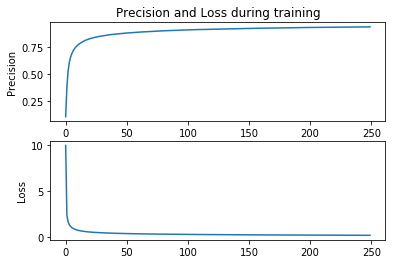

In [20]:
plt.subplot(2, 1, 1)
plt.title('Precision and Loss during training')
plt.plot(prec_conv)
plt.ylabel('Precision')
plt.subplot(2, 1, 2)
plt.plot(loss_conv)
plt.ylabel('Loss');

### Spam Base Dataset 

In [5]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/
data = []
f = open('data/spambase.data', "r")
data = f.readlines()
np.random.shuffle(data)
f.close()

X = np.array(list(map(lambda d: [float(x) for x in d[:-1].split(',')[:-1]], data)))
to_class = lambda x: np.array([1, 0]) if x==0 else np.array([0, 1])
y = np.array(list(map(lambda d: to_class(int(d[:-1].split(',')[-1])), data)))
n_data, train_frac = X.shape[0], 0.8

# massaging data into compatible formats as:
m = int(n_data*train_frac)
X_train, y_train = X[:m].T, y[:m].T
X_test, y_test = X[m:].T, y[m:].T

In [8]:
n_h = 256 # 128
nn = NeuralNetwork(X_train, y_train, n_h)

loss_conv_2, prec_conv_2 = [], []
for i in tqdm(range(2500)):
    scores = nn.train(X_train, y_train)
    if (i % 10 == 0):
        print("Epoch", i, "loss: ", scores['loss'])
        print("Epoch", i, "precision: ", scores['prec'])
        loss_conv_2.append(scores['loss'])
        prec_conv_2.append(scores['prec'])

  0%|          | 0/2500 [00:00<?, ?it/s]/root/miniconda3/envs/invoicenet/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
  0%|          | 2/2500 [00:00<08:26,  4.93it/s]

Epoch 0 loss:  12.781733817420603
Epoch 0 precision:  0.6038043478260869


  0%|          | 12/2500 [00:02<07:42,  5.38it/s]

Epoch 10 loss:  3.723019904514889
Epoch 10 precision:  0.6038043478260869


  1%|          | 22/2500 [00:04<08:03,  5.13it/s]

Epoch 20 loss:  37.55676530778255
Epoch 20 precision:  0.41494565217391305


  1%|▏         | 32/2500 [00:06<07:43,  5.32it/s]

Epoch 30 loss:  2.8325327662752597
Epoch 30 precision:  0.5051630434782609


  2%|▏         | 42/2500 [00:08<07:43,  5.31it/s]

Epoch 40 loss:  25.128822464922813
Epoch 40 precision:  0.6038043478260869


  2%|▏         | 52/2500 [00:10<07:56,  5.14it/s]

Epoch 50 loss:  1.352351819574663
Epoch 50 precision:  0.6220108695652173


  2%|▏         | 61/2500 [00:11<07:53,  5.15it/s]

Epoch 60 loss:  1.6277976824861236
Epoch 60 precision:  0.6141304347826086


  3%|▎         | 72/2500 [00:13<07:44,  5.22it/s]

Epoch 70 loss:  20.871783037075136
Epoch 70 precision:  0.6038043478260869


  3%|▎         | 82/2500 [00:15<07:49,  5.15it/s]

Epoch 80 loss:  3.8891590825692823
Epoch 80 precision:  0.4989130434782609


  4%|▎         | 92/2500 [00:17<07:49,  5.13it/s]

Epoch 90 loss:  5.081570310565168
Epoch 90 precision:  0.49619565217391304


  4%|▍         | 102/2500 [00:19<07:41,  5.19it/s]

Epoch 100 loss:  23.78920521224997
Epoch 100 precision:  0.6038043478260869


  4%|▍         | 111/2500 [00:21<07:53,  5.05it/s]

Epoch 110 loss:  10.898419404888125
Epoch 110 precision:  0.46630434782608693


  5%|▍         | 121/2500 [00:23<07:52,  5.04it/s]

Epoch 120 loss:  22.60283296863652
Epoch 120 precision:  0.6038043478260869


  5%|▌         | 131/2500 [00:25<07:54,  4.99it/s]

Epoch 130 loss:  1.9042670048529626
Epoch 130 precision:  0.6165760869565218


  6%|▌         | 141/2500 [00:27<08:04,  4.87it/s]

Epoch 140 loss:  24.740073522219703
Epoch 140 precision:  0.42527173913043476


  6%|▌         | 151/2500 [00:29<08:07,  4.82it/s]

Epoch 150 loss:  24.076272814337226
Epoch 150 precision:  0.6038043478260869


  6%|▋         | 161/2500 [00:31<08:03,  4.84it/s]

Epoch 160 loss:  11.693613765953886
Epoch 160 precision:  0.46005434782608695


  7%|▋         | 171/2500 [00:34<08:02,  4.82it/s]

Epoch 170 loss:  1.5774821998181523
Epoch 170 precision:  0.6203804347826087


  7%|▋         | 181/2500 [00:36<08:05,  4.77it/s]

Epoch 180 loss:  24.780736301658997
Epoch 180 precision:  0.6038043478260869


  8%|▊         | 191/2500 [00:38<07:55,  4.86it/s]

Epoch 190 loss:  1.848495253598175
Epoch 190 precision:  0.627445652173913


  8%|▊         | 201/2500 [00:40<08:04,  4.74it/s]

Epoch 200 loss:  7.045698121780963
Epoch 200 precision:  0.6038043478260869


  8%|▊         | 211/2500 [00:42<08:01,  4.76it/s]

Epoch 210 loss:  15.769203625154246
Epoch 210 precision:  0.6038043478260869


  9%|▉         | 221/2500 [00:44<08:14,  4.60it/s]

Epoch 220 loss:  24.41677068594723
Epoch 220 precision:  0.6038043478260869


  9%|▉         | 231/2500 [00:46<08:15,  4.58it/s]

Epoch 230 loss:  1.2191680087436567
Epoch 230 precision:  0.53125


 10%|▉         | 241/2500 [00:48<07:46,  4.85it/s]

Epoch 240 loss:  6.894671043362499
Epoch 240 precision:  0.6038043478260869


 10%|█         | 251/2500 [00:51<07:51,  4.77it/s]

Epoch 250 loss:  0.862395850827661
Epoch 250 precision:  0.5616847826086957


 10%|█         | 262/2500 [00:53<07:38,  4.88it/s]

Epoch 260 loss:  21.0433633419736
Epoch 260 precision:  0.6038043478260869


 11%|█         | 271/2500 [00:55<07:47,  4.77it/s]

Epoch 270 loss:  9.826067342294081
Epoch 270 precision:  0.4611413043478261


 11%|█         | 281/2500 [00:57<08:01,  4.61it/s]

Epoch 280 loss:  12.641866803702749
Epoch 280 precision:  0.6038043478260869


 12%|█▏        | 291/2500 [00:59<07:55,  4.65it/s]

Epoch 290 loss:  21.419025303289402
Epoch 290 precision:  0.43125


 12%|█▏        | 301/2500 [01:01<08:24,  4.36it/s]

Epoch 300 loss:  1.3680367750154812
Epoch 300 precision:  0.6168478260869565


 12%|█▏        | 311/2500 [01:04<08:16,  4.41it/s]

Epoch 310 loss:  19.688435381315966
Epoch 310 precision:  0.43369565217391304


 13%|█▎        | 321/2500 [01:06<07:47,  4.66it/s]

Epoch 320 loss:  10.967104609274317
Epoch 320 precision:  0.45543478260869563


 13%|█▎        | 331/2500 [01:08<07:54,  4.57it/s]

Epoch 330 loss:  19.281106403424662
Epoch 330 precision:  0.6038043478260869


 14%|█▎        | 341/2500 [01:10<07:47,  4.62it/s]

Epoch 340 loss:  3.509340673245299
Epoch 340 precision:  0.49972826086956523


 14%|█▍        | 351/2500 [01:12<07:42,  4.65it/s]

Epoch 350 loss:  19.27040760271603
Epoch 350 precision:  0.6038043478260869


 14%|█▍        | 361/2500 [01:14<07:52,  4.52it/s]

Epoch 360 loss:  0.7906574107251817
Epoch 360 precision:  0.6407608695652174


 15%|█▍        | 371/2500 [01:17<07:30,  4.72it/s]

Epoch 370 loss:  15.102450050484352
Epoch 370 precision:  0.6038043478260869


 15%|█▌        | 381/2500 [01:19<07:21,  4.79it/s]

Epoch 380 loss:  13.720563526840424
Epoch 380 precision:  0.6038043478260869


 16%|█▌        | 392/2500 [01:21<06:58,  5.03it/s]

Epoch 390 loss:  20.869787407108305
Epoch 390 precision:  0.6038043478260869


 16%|█▌        | 401/2500 [01:23<07:01,  4.98it/s]

Epoch 400 loss:  19.822127759818006
Epoch 400 precision:  0.6038043478260869


 16%|█▋        | 411/2500 [01:25<07:23,  4.71it/s]

Epoch 410 loss:  0.8389169079160144
Epoch 410 precision:  0.6554347826086957


 17%|█▋        | 421/2500 [01:27<07:24,  4.68it/s]

Epoch 420 loss:  12.887162955414661
Epoch 420 precision:  0.6038043478260869


 17%|█▋        | 431/2500 [01:29<07:24,  4.65it/s]

Epoch 430 loss:  12.441624932596731
Epoch 430 precision:  0.6038043478260869


 18%|█▊        | 441/2500 [01:31<07:23,  4.64it/s]

Epoch 440 loss:  19.542431699607597
Epoch 440 precision:  0.6038043478260869


 18%|█▊        | 451/2500 [01:33<07:19,  4.66it/s]

Epoch 450 loss:  18.780386929891552
Epoch 450 precision:  0.6038043478260869


 18%|█▊        | 461/2500 [01:36<07:20,  4.63it/s]

Epoch 460 loss:  0.8065541731461382
Epoch 460 precision:  0.6394021739130434


 19%|█▉        | 471/2500 [01:38<07:09,  4.72it/s]

Epoch 470 loss:  8.834574365838781
Epoch 470 precision:  0.4573369565217391


 19%|█▉        | 481/2500 [01:40<07:16,  4.63it/s]

Epoch 480 loss:  14.016395328217131
Epoch 480 precision:  0.6038043478260869


 20%|█▉        | 491/2500 [01:42<07:26,  4.50it/s]

Epoch 490 loss:  15.190664881905256
Epoch 490 precision:  0.6038043478260869


 20%|██        | 501/2500 [01:44<07:09,  4.65it/s]

Epoch 500 loss:  15.23763386484981
Epoch 500 precision:  0.6038043478260869


 20%|██        | 511/2500 [01:46<07:03,  4.70it/s]

Epoch 510 loss:  19.682573511480793
Epoch 510 precision:  0.6038043478260869


 21%|██        | 521/2500 [01:48<06:55,  4.77it/s]

Epoch 520 loss:  18.972723389452376
Epoch 520 precision:  0.6038043478260869


 21%|██        | 531/2500 [01:51<06:48,  4.82it/s]

Epoch 530 loss:  17.473430442542682
Epoch 530 precision:  0.4331521739130435


 22%|██▏       | 542/2500 [01:53<07:13,  4.52it/s]

Epoch 540 loss:  15.507331655288564
Epoch 540 precision:  0.4434782608695652


 22%|██▏       | 552/2500 [01:55<07:25,  4.37it/s]

Epoch 550 loss:  10.996779829188496
Epoch 550 precision:  0.45271739130434785


 22%|██▏       | 561/2500 [01:57<07:11,  4.49it/s]

Epoch 560 loss:  19.146542020465567
Epoch 560 precision:  0.43125


 23%|██▎       | 572/2500 [01:59<06:20,  5.07it/s]

Epoch 570 loss:  8.406893888764987
Epoch 570 precision:  0.4595108695652174


 23%|██▎       | 581/2500 [02:01<06:40,  4.79it/s]

Epoch 580 loss:  1.4802029918564412
Epoch 580 precision:  0.6217391304347826


 24%|██▎       | 591/2500 [02:03<06:56,  4.58it/s]

Epoch 590 loss:  3.324315060692526
Epoch 590 precision:  0.6190217391304348


 24%|██▍       | 601/2500 [02:06<06:45,  4.68it/s]

Epoch 600 loss:  2.396766291088269
Epoch 600 precision:  0.6230978260869565


 24%|██▍       | 611/2500 [02:08<06:45,  4.66it/s]

Epoch 610 loss:  11.79745073261922
Epoch 610 precision:  0.6038043478260869


 25%|██▍       | 621/2500 [02:10<06:33,  4.78it/s]

Epoch 620 loss:  19.045228349007523
Epoch 620 precision:  0.6038043478260869


 25%|██▌       | 631/2500 [02:12<06:32,  4.76it/s]

Epoch 630 loss:  18.483378447448548
Epoch 630 precision:  0.6038043478260869


 26%|██▌       | 641/2500 [02:14<06:37,  4.67it/s]

Epoch 640 loss:  16.789380069506734
Epoch 640 precision:  0.43777173913043477


 26%|██▌       | 651/2500 [02:16<06:31,  4.73it/s]

Epoch 650 loss:  0.8979223636179124
Epoch 650 precision:  0.6532608695652173


 26%|██▋       | 661/2500 [02:18<06:28,  4.73it/s]

Epoch 660 loss:  1.5251264664294983
Epoch 660 precision:  0.5461956521739131


 27%|██▋       | 671/2500 [02:20<06:36,  4.62it/s]

Epoch 670 loss:  1.928786109362689
Epoch 670 precision:  0.5445652173913044


 27%|██▋       | 681/2500 [02:23<06:39,  4.56it/s]

Epoch 680 loss:  1.2036366510354681
Epoch 680 precision:  0.5334239130434782


 28%|██▊       | 691/2500 [02:25<06:26,  4.69it/s]

Epoch 690 loss:  0.9306093007342959
Epoch 690 precision:  0.6491847826086956


 28%|██▊       | 701/2500 [02:27<06:27,  4.65it/s]

Epoch 700 loss:  3.4240479912869586
Epoch 700 precision:  0.6190217391304348


 28%|██▊       | 711/2500 [02:29<06:13,  4.79it/s]

Epoch 710 loss:  19.433102353764127
Epoch 710 precision:  0.6038043478260869


 29%|██▉       | 721/2500 [02:31<06:15,  4.74it/s]

Epoch 720 loss:  19.342228761641206
Epoch 720 precision:  0.6038043478260869


 29%|██▉       | 731/2500 [02:33<05:49,  5.06it/s]

Epoch 730 loss:  19.309418788424903
Epoch 730 precision:  0.6038043478260869


 30%|██▉       | 741/2500 [02:35<06:05,  4.81it/s]

Epoch 740 loss:  18.832906138399608
Epoch 740 precision:  0.6038043478260869


 30%|███       | 751/2500 [02:37<06:10,  4.72it/s]

Epoch 750 loss:  14.828154879412798
Epoch 750 precision:  0.6038043478260869


 30%|███       | 761/2500 [02:40<06:12,  4.67it/s]

Epoch 760 loss:  14.149969668090554
Epoch 760 precision:  0.6038043478260869


 31%|███       | 771/2500 [02:42<06:06,  4.72it/s]

Epoch 770 loss:  15.615760345012523
Epoch 770 precision:  0.6038043478260869


 31%|███       | 781/2500 [02:44<06:05,  4.70it/s]

Epoch 780 loss:  14.055187921111644
Epoch 780 precision:  0.6038043478260869


 32%|███▏      | 791/2500 [02:46<05:46,  4.94it/s]

Epoch 790 loss:  14.971115556878068
Epoch 790 precision:  0.6038043478260869


 32%|███▏      | 801/2500 [02:48<05:54,  4.80it/s]

Epoch 800 loss:  13.381244011372791
Epoch 800 precision:  0.6038043478260869


 32%|███▏      | 811/2500 [02:50<05:43,  4.92it/s]

Epoch 810 loss:  14.374528738624546
Epoch 810 precision:  0.6038043478260869


 33%|███▎      | 821/2500 [02:52<05:59,  4.67it/s]

Epoch 820 loss:  11.660686238958643
Epoch 820 precision:  0.6084239130434783


 33%|███▎      | 831/2500 [02:54<05:45,  4.83it/s]

Epoch 830 loss:  18.946403298088033
Epoch 830 precision:  0.4380434782608696


 34%|███▎      | 841/2500 [02:56<05:39,  4.89it/s]

Epoch 840 loss:  6.810297318745474
Epoch 840 precision:  0.4722826086956522


 34%|███▍      | 851/2500 [02:58<05:47,  4.74it/s]

Epoch 850 loss:  2.1772417969784597
Epoch 850 precision:  0.5154891304347826


 34%|███▍      | 861/2500 [03:00<05:49,  4.69it/s]

Epoch 860 loss:  3.098338884884141
Epoch 860 precision:  0.5108695652173914


 35%|███▍      | 871/2500 [03:03<06:55,  3.92it/s]

Epoch 870 loss:  13.656847260421406
Epoch 870 precision:  0.6038043478260869


 35%|███▌      | 881/2500 [03:05<06:19,  4.26it/s]

Epoch 880 loss:  16.2884749175049
Epoch 880 precision:  0.6038043478260869


 36%|███▌      | 891/2500 [03:08<07:26,  3.60it/s]

Epoch 890 loss:  3.9322276764009563
Epoch 890 precision:  0.5328804347826087


 36%|███▌      | 901/2500 [03:10<06:49,  3.91it/s]

Epoch 900 loss:  12.440295855592451
Epoch 900 precision:  0.4519021739130435


 36%|███▋      | 911/2500 [03:13<07:44,  3.42it/s]

Epoch 910 loss:  4.34147780218106
Epoch 910 precision:  0.6192934782608696


 37%|███▋      | 921/2500 [03:16<06:40,  3.94it/s]

Epoch 920 loss:  17.3009487316618
Epoch 920 precision:  0.6038043478260869


 37%|███▋      | 931/2500 [03:18<05:57,  4.39it/s]

Epoch 930 loss:  4.777402964627703
Epoch 930 precision:  0.4861413043478261


 38%|███▊      | 941/2500 [03:20<05:21,  4.85it/s]

Epoch 940 loss:  4.642890844498932
Epoch 940 precision:  0.4956521739130435


 38%|███▊      | 951/2500 [03:22<05:19,  4.85it/s]

Epoch 950 loss:  4.911104487001582
Epoch 950 precision:  0.4861413043478261


 38%|███▊      | 962/2500 [03:24<05:06,  5.01it/s]

Epoch 960 loss:  5.924348076530332
Epoch 960 precision:  0.4722826086956522


 39%|███▉      | 972/2500 [03:26<04:57,  5.14it/s]

Epoch 970 loss:  6.466713404097218
Epoch 970 precision:  0.46875


 39%|███▉      | 982/2500 [03:28<04:54,  5.15it/s]

Epoch 980 loss:  3.7131881793004724
Epoch 980 precision:  0.48994565217391306


 40%|███▉      | 991/2500 [03:30<05:01,  5.01it/s]

Epoch 990 loss:  19.513462973046032
Epoch 990 precision:  0.6038043478260869


 40%|████      | 1001/2500 [03:32<05:08,  4.85it/s]

Epoch 1000 loss:  19.19027855365256
Epoch 1000 precision:  0.6038043478260869


 40%|████      | 1012/2500 [03:34<04:51,  5.10it/s]

Epoch 1010 loss:  18.784871862791814
Epoch 1010 precision:  0.6038043478260869


 41%|████      | 1021/2500 [03:36<04:51,  5.08it/s]

Epoch 1020 loss:  18.828511927183513
Epoch 1020 precision:  0.6038043478260869


 41%|████▏     | 1032/2500 [03:38<04:42,  5.19it/s]

Epoch 1030 loss:  15.496051079560498
Epoch 1030 precision:  0.6038043478260869


 42%|████▏     | 1041/2500 [03:40<05:00,  4.85it/s]

Epoch 1040 loss:  17.173960366755367
Epoch 1040 precision:  0.6038043478260869


 42%|████▏     | 1051/2500 [03:42<05:41,  4.24it/s]

Epoch 1050 loss:  1.9331864367185738
Epoch 1050 precision:  0.49483695652173915


 42%|████▏     | 1062/2500 [03:44<04:43,  5.07it/s]

Epoch 1060 loss:  2.046508347371058
Epoch 1060 precision:  0.5133152173913044


 43%|████▎     | 1071/2500 [03:46<04:52,  4.89it/s]

Epoch 1070 loss:  13.799979575851905
Epoch 1070 precision:  0.4407608695652174


 43%|████▎     | 1082/2500 [03:48<04:38,  5.09it/s]

Epoch 1080 loss:  11.323495829693625
Epoch 1080 precision:  0.44565217391304346


 44%|████▎     | 1091/2500 [03:50<04:40,  5.02it/s]

Epoch 1090 loss:  1.0186469836534249
Epoch 1090 precision:  0.6616847826086957


 44%|████▍     | 1101/2500 [03:52<04:42,  4.95it/s]

Epoch 1100 loss:  17.190896905707145
Epoch 1100 precision:  0.6038043478260869


 44%|████▍     | 1111/2500 [03:54<05:03,  4.58it/s]

Epoch 1110 loss:  1.2745084943046763
Epoch 1110 precision:  0.6372282608695652


 45%|████▍     | 1121/2500 [03:56<04:44,  4.85it/s]

Epoch 1120 loss:  19.357855530611086
Epoch 1120 precision:  0.6038043478260869


 45%|████▌     | 1131/2500 [03:59<04:42,  4.84it/s]

Epoch 1130 loss:  19.30445301232278
Epoch 1130 precision:  0.6038043478260869


 46%|████▌     | 1141/2500 [04:01<04:34,  4.96it/s]

Epoch 1140 loss:  19.07343576683099
Epoch 1140 precision:  0.6038043478260869


 46%|████▌     | 1151/2500 [04:03<04:35,  4.90it/s]

Epoch 1150 loss:  18.687919370440703
Epoch 1150 precision:  0.6038043478260869


 46%|████▋     | 1161/2500 [04:05<04:24,  5.05it/s]

Epoch 1160 loss:  18.699123526749954
Epoch 1160 precision:  0.6038043478260869


 47%|████▋     | 1172/2500 [04:07<04:27,  4.97it/s]

Epoch 1170 loss:  18.443116931665475
Epoch 1170 precision:  0.6038043478260869


 47%|████▋     | 1181/2500 [04:09<04:25,  4.96it/s]

Epoch 1180 loss:  17.795617233967096
Epoch 1180 precision:  0.6040760869565217


 48%|████▊     | 1192/2500 [04:11<04:24,  4.94it/s]

Epoch 1190 loss:  17.58354607953529
Epoch 1190 precision:  0.6040760869565217


 48%|████▊     | 1201/2500 [04:13<04:40,  4.62it/s]

Epoch 1200 loss:  17.66592739450163
Epoch 1200 precision:  0.6038043478260869


 48%|████▊     | 1211/2500 [04:15<04:33,  4.72it/s]

Epoch 1210 loss:  14.00293148260486
Epoch 1210 precision:  0.6119565217391304


 49%|████▉     | 1221/2500 [04:17<04:09,  5.12it/s]

Epoch 1220 loss:  11.143177534600063
Epoch 1220 precision:  0.4394021739130435


 49%|████▉     | 1231/2500 [04:19<04:17,  4.93it/s]

Epoch 1230 loss:  17.85076153378517
Epoch 1230 precision:  0.6040760869565217


 50%|████▉     | 1241/2500 [04:21<04:08,  5.07it/s]

Epoch 1240 loss:  12.83568844870261
Epoch 1240 precision:  0.6154891304347826


 50%|█████     | 1252/2500 [04:23<03:56,  5.28it/s]

Epoch 1250 loss:  16.53995025454453
Epoch 1250 precision:  0.6040760869565217


 50%|█████     | 1262/2500 [04:25<04:03,  5.08it/s]

Epoch 1260 loss:  2.62954684424318
Epoch 1260 precision:  0.4964673913043478


 51%|█████     | 1271/2500 [04:27<04:09,  4.92it/s]

Epoch 1270 loss:  9.680821560797218
Epoch 1270 precision:  0.4519021739130435


 51%|█████▏    | 1282/2500 [04:29<03:50,  5.27it/s]

Epoch 1280 loss:  0.9351152991514398
Epoch 1280 precision:  0.6695652173913044


 52%|█████▏    | 1292/2500 [04:31<03:55,  5.13it/s]

Epoch 1290 loss:  1.746882648342162
Epoch 1290 precision:  0.6339673913043479


 52%|█████▏    | 1302/2500 [04:33<03:55,  5.08it/s]

Epoch 1300 loss:  1.5251634682903554
Epoch 1300 precision:  0.6309782608695652


 52%|█████▏    | 1312/2500 [04:35<03:53,  5.09it/s]

Epoch 1310 loss:  1.68455579222518
Epoch 1310 precision:  0.6385869565217391


 53%|█████▎    | 1321/2500 [04:37<04:04,  4.82it/s]

Epoch 1320 loss:  1.33102225540927
Epoch 1320 precision:  0.6429347826086956


 53%|█████▎    | 1331/2500 [04:39<03:59,  4.88it/s]

Epoch 1330 loss:  15.061466663171533
Epoch 1330 precision:  0.6100543478260869


 54%|█████▎    | 1342/2500 [04:41<03:48,  5.06it/s]

Epoch 1340 loss:  1.063505215501345
Epoch 1340 precision:  0.6627717391304347


 54%|█████▍    | 1352/2500 [04:43<03:43,  5.13it/s]

Epoch 1350 loss:  1.9871613883061545
Epoch 1350 precision:  0.6358695652173914


 54%|█████▍    | 1361/2500 [04:45<03:55,  4.84it/s]

Epoch 1360 loss:  13.065169340990806
Epoch 1360 precision:  0.43967391304347825


 55%|█████▍    | 1372/2500 [04:47<03:39,  5.14it/s]

Epoch 1370 loss:  17.938543756180323
Epoch 1370 precision:  0.6040760869565217


 55%|█████▌    | 1382/2500 [04:49<03:40,  5.08it/s]

Epoch 1380 loss:  18.745950177366126
Epoch 1380 precision:  0.6040760869565217


 56%|█████▌    | 1392/2500 [04:51<03:38,  5.07it/s]

Epoch 1390 loss:  18.49399440456165
Epoch 1390 precision:  0.6038043478260869


 56%|█████▌    | 1401/2500 [04:53<03:49,  4.79it/s]

Epoch 1400 loss:  10.751599986890628
Epoch 1400 precision:  0.6179347826086956


 56%|█████▋    | 1411/2500 [04:55<03:35,  5.05it/s]

Epoch 1410 loss:  1.7151418518058783
Epoch 1410 precision:  0.6459239130434783


 57%|█████▋    | 1421/2500 [04:57<03:44,  4.80it/s]

Epoch 1420 loss:  13.327189238780251
Epoch 1420 precision:  0.6152173913043478


 57%|█████▋    | 1431/2500 [04:59<03:55,  4.53it/s]

Epoch 1430 loss:  15.435199864702248
Epoch 1430 precision:  0.6043478260869565


 58%|█████▊    | 1441/2500 [05:01<04:14,  4.16it/s]

Epoch 1440 loss:  2.550794645404139
Epoch 1440 precision:  0.4885869565217391


 58%|█████▊    | 1451/2500 [05:04<04:37,  3.78it/s]

Epoch 1450 loss:  17.563004834119827
Epoch 1450 precision:  0.6038043478260869


 58%|█████▊    | 1462/2500 [05:06<03:29,  4.96it/s]

Epoch 1460 loss:  16.242952941925928
Epoch 1460 precision:  0.6040760869565217


 59%|█████▉    | 1471/2500 [05:08<03:22,  5.07it/s]

Epoch 1470 loss:  14.196010670110176
Epoch 1470 precision:  0.6046195652173914


 59%|█████▉    | 1481/2500 [05:10<03:38,  4.66it/s]

Epoch 1480 loss:  1.1175009155460136
Epoch 1480 precision:  0.6627717391304347


 60%|█████▉    | 1491/2500 [05:12<03:35,  4.69it/s]

Epoch 1490 loss:  17.48391960637343
Epoch 1490 precision:  0.6043478260869565


 60%|██████    | 1501/2500 [05:14<03:31,  4.72it/s]

Epoch 1500 loss:  10.509365086504065
Epoch 1500 precision:  0.4364130434782609


 60%|██████    | 1511/2500 [05:17<04:05,  4.03it/s]

Epoch 1510 loss:  3.2691558419177182
Epoch 1510 precision:  0.48777173913043476


 61%|██████    | 1521/2500 [05:19<03:16,  4.97it/s]

Epoch 1520 loss:  3.101767977416613
Epoch 1520 precision:  0.4953804347826087


 61%|██████▏   | 1532/2500 [05:21<03:11,  5.05it/s]

Epoch 1530 loss:  1.215658001824338
Epoch 1530 precision:  0.6701086956521739


 62%|██████▏   | 1541/2500 [05:23<03:39,  4.38it/s]

Epoch 1540 loss:  13.282661870211127
Epoch 1540 precision:  0.4418478260869565


 62%|██████▏   | 1551/2500 [05:25<03:42,  4.27it/s]

Epoch 1550 loss:  14.413252296806666
Epoch 1550 precision:  0.44130434782608696


 62%|██████▏   | 1561/2500 [05:27<03:27,  4.52it/s]

Epoch 1560 loss:  5.192941789429308
Epoch 1560 precision:  0.4861413043478261


 63%|██████▎   | 1571/2500 [05:29<03:19,  4.65it/s]

Epoch 1570 loss:  14.421282672585782
Epoch 1570 precision:  0.6130434782608696


 63%|██████▎   | 1581/2500 [05:32<03:18,  4.64it/s]

Epoch 1580 loss:  15.397102100542964
Epoch 1580 precision:  0.6040760869565217


 64%|██████▎   | 1592/2500 [05:34<02:58,  5.07it/s]

Epoch 1590 loss:  0.9997137318777396
Epoch 1590 precision:  0.6641304347826087


 64%|██████▍   | 1602/2500 [05:36<02:55,  5.12it/s]

Epoch 1600 loss:  16.23749906459022
Epoch 1600 precision:  0.6046195652173914


 64%|██████▍   | 1611/2500 [05:38<02:59,  4.95it/s]

Epoch 1610 loss:  11.859239064961614
Epoch 1610 precision:  0.6141304347826086


 65%|██████▍   | 1622/2500 [05:40<02:48,  5.22it/s]

Epoch 1620 loss:  1.3707225978033613
Epoch 1620 precision:  0.6717391304347826


 65%|██████▌   | 1631/2500 [05:42<02:54,  4.99it/s]

Epoch 1630 loss:  15.646783299129591
Epoch 1630 precision:  0.6046195652173914


 66%|██████▌   | 1642/2500 [05:44<02:48,  5.11it/s]

Epoch 1640 loss:  0.9539728687618731
Epoch 1640 precision:  0.6614130434782609


 66%|██████▌   | 1652/2500 [05:46<02:43,  5.18it/s]

Epoch 1650 loss:  3.105858027157138
Epoch 1650 precision:  0.6220108695652173


 66%|██████▋   | 1661/2500 [05:48<02:48,  4.98it/s]

Epoch 1660 loss:  0.9656115472813316
Epoch 1660 precision:  0.6739130434782609


 67%|██████▋   | 1671/2500 [05:50<02:49,  4.90it/s]

Epoch 1670 loss:  11.578805973767071
Epoch 1670 precision:  0.4494565217391304


 67%|██████▋   | 1682/2500 [05:52<02:39,  5.13it/s]

Epoch 1680 loss:  12.918316286379623
Epoch 1680 precision:  0.6127717391304348


 68%|██████▊   | 1691/2500 [05:54<02:47,  4.83it/s]

Epoch 1690 loss:  15.826455170265245
Epoch 1690 precision:  0.6108695652173913


 68%|██████▊   | 1701/2500 [05:56<02:57,  4.49it/s]

Epoch 1700 loss:  1.127105395802143
Epoch 1700 precision:  0.6725543478260869


 68%|██████▊   | 1712/2500 [05:58<02:41,  4.88it/s]

Epoch 1710 loss:  6.235586987329173
Epoch 1710 precision:  0.4923913043478261


 69%|██████▉   | 1721/2500 [06:00<02:46,  4.68it/s]

Epoch 1720 loss:  13.695308636581878
Epoch 1720 precision:  0.44782608695652176


 69%|██████▉   | 1731/2500 [06:02<02:35,  4.93it/s]

Epoch 1730 loss:  1.041976683336424
Epoch 1730 precision:  0.6796195652173913


 70%|██████▉   | 1742/2500 [06:04<02:27,  5.13it/s]

Epoch 1740 loss:  14.517383607394562
Epoch 1740 precision:  0.6146739130434783


 70%|███████   | 1752/2500 [06:06<02:29,  4.99it/s]

Epoch 1750 loss:  1.0481576426028105
Epoch 1750 precision:  0.675


 70%|███████   | 1761/2500 [06:08<02:31,  4.87it/s]

Epoch 1760 loss:  15.737297231997388
Epoch 1760 precision:  0.6043478260869565


 71%|███████   | 1771/2500 [06:10<02:22,  5.11it/s]

Epoch 1770 loss:  1.1177678028239462
Epoch 1770 precision:  0.5366847826086957


 71%|███████   | 1781/2500 [06:12<02:20,  5.11it/s]

Epoch 1780 loss:  6.946441191188527
Epoch 1780 precision:  0.6209239130434783


 72%|███████▏  | 1792/2500 [06:14<02:17,  5.16it/s]

Epoch 1790 loss:  5.637009791816354
Epoch 1790 precision:  0.4880434782608696


 72%|███████▏  | 1802/2500 [06:16<02:18,  5.05it/s]

Epoch 1800 loss:  13.509443839826814
Epoch 1800 precision:  0.6059782608695652


 72%|███████▏  | 1811/2500 [06:18<02:17,  4.99it/s]

Epoch 1810 loss:  2.5958978847452343
Epoch 1810 precision:  0.5252717391304348


 73%|███████▎  | 1822/2500 [06:20<02:10,  5.20it/s]

Epoch 1820 loss:  16.38616730496802
Epoch 1820 precision:  0.6057065217391304


 73%|███████▎  | 1831/2500 [06:22<02:14,  4.97it/s]

Epoch 1830 loss:  6.369211756508847
Epoch 1830 precision:  0.47554347826086957


 74%|███████▎  | 1841/2500 [06:24<02:14,  4.89it/s]

Epoch 1840 loss:  12.2329357430425
Epoch 1840 precision:  0.4410326086956522


 74%|███████▍  | 1851/2500 [06:26<02:13,  4.88it/s]

Epoch 1850 loss:  1.5643909009561512
Epoch 1850 precision:  0.5578804347826087


 74%|███████▍  | 1861/2500 [06:28<02:14,  4.74it/s]

Epoch 1860 loss:  1.1277567441319982
Epoch 1860 precision:  0.6722826086956522


 75%|███████▍  | 1871/2500 [06:30<02:11,  4.79it/s]

Epoch 1870 loss:  3.057181879630339
Epoch 1870 precision:  0.5054347826086957


 75%|███████▌  | 1881/2500 [06:33<02:09,  4.79it/s]

Epoch 1880 loss:  1.4823715127933592
Epoch 1880 precision:  0.6404891304347826


 76%|███████▌  | 1891/2500 [06:35<02:05,  4.85it/s]

Epoch 1890 loss:  12.608139072976817
Epoch 1890 precision:  0.6157608695652174


 76%|███████▌  | 1901/2500 [06:37<02:03,  4.85it/s]

Epoch 1900 loss:  4.679058367131633
Epoch 1900 precision:  0.5


 76%|███████▋  | 1911/2500 [06:39<02:01,  4.86it/s]

Epoch 1910 loss:  17.908708969386097
Epoch 1910 precision:  0.6043478260869565


 77%|███████▋  | 1921/2500 [06:41<01:57,  4.93it/s]

Epoch 1920 loss:  16.35820529825824
Epoch 1920 precision:  0.6059782608695652


 77%|███████▋  | 1931/2500 [06:43<01:55,  4.95it/s]

Epoch 1930 loss:  15.76985536372145
Epoch 1930 precision:  0.60625


 78%|███████▊  | 1941/2500 [06:45<01:57,  4.78it/s]

Epoch 1940 loss:  1.128092738567014
Epoch 1940 precision:  0.6790760869565218


 78%|███████▊  | 1951/2500 [06:47<01:52,  4.89it/s]

Epoch 1950 loss:  12.664698122225412
Epoch 1950 precision:  0.6165760869565218


 78%|███████▊  | 1961/2500 [06:49<01:56,  4.64it/s]

Epoch 1960 loss:  1.6273817265210277
Epoch 1960 precision:  0.5679347826086957


 79%|███████▉  | 1971/2500 [06:51<01:50,  4.80it/s]

Epoch 1970 loss:  16.168039538111554
Epoch 1970 precision:  0.6059782608695652


 79%|███████▉  | 1982/2500 [06:53<01:41,  5.09it/s]

Epoch 1980 loss:  1.1433211624303083
Epoch 1980 precision:  0.6785326086956521


 80%|███████▉  | 1992/2500 [06:55<01:39,  5.12it/s]

Epoch 1990 loss:  4.372483111289858
Epoch 1990 precision:  0.6220108695652173


 80%|████████  | 2002/2500 [06:57<01:37,  5.09it/s]

Epoch 2000 loss:  13.515160432345478
Epoch 2000 precision:  0.6171195652173913


 80%|████████  | 2012/2500 [06:59<01:36,  5.07it/s]

Epoch 2010 loss:  14.75180883541015
Epoch 2010 precision:  0.6133152173913043


 81%|████████  | 2022/2500 [07:01<01:34,  5.08it/s]

Epoch 2020 loss:  12.462816891146856
Epoch 2020 precision:  0.4385869565217391


 81%|████████▏ | 2032/2500 [07:03<01:32,  5.08it/s]

Epoch 2030 loss:  12.904031165802436
Epoch 2030 precision:  0.6135869565217391


 82%|████████▏ | 2041/2500 [07:05<01:38,  4.68it/s]

Epoch 2040 loss:  2.289032381540648
Epoch 2040 precision:  0.5478260869565217


 82%|████████▏ | 2051/2500 [07:07<01:35,  4.70it/s]

Epoch 2050 loss:  13.358570157856498
Epoch 2050 precision:  0.6165760869565218


 82%|████████▏ | 2062/2500 [07:10<01:26,  5.04it/s]

Epoch 2060 loss:  1.2086192802793503
Epoch 2060 precision:  0.5679347826086957


 83%|████████▎ | 2071/2500 [07:11<01:22,  5.19it/s]

Epoch 2070 loss:  10.672712525962618
Epoch 2070 precision:  0.6179347826086956


 83%|████████▎ | 2081/2500 [07:13<01:22,  5.07it/s]

Epoch 2080 loss:  2.4866069940405384
Epoch 2080 precision:  0.5404891304347826


 84%|████████▎ | 2092/2500 [07:16<01:20,  5.07it/s]

Epoch 2090 loss:  15.070958394416296
Epoch 2090 precision:  0.6125


 84%|████████▍ | 2101/2500 [07:17<01:25,  4.65it/s]

Epoch 2100 loss:  1.3481769048190744
Epoch 2100 precision:  0.6741847826086956


 84%|████████▍ | 2111/2500 [07:20<01:22,  4.70it/s]

Epoch 2110 loss:  3.850767371240304
Epoch 2110 precision:  0.5423913043478261


 85%|████████▍ | 2121/2500 [07:22<01:23,  4.51it/s]

Epoch 2120 loss:  14.87527964001056
Epoch 2120 precision:  0.60625


 85%|████████▌ | 2131/2500 [07:24<01:20,  4.58it/s]

Epoch 2130 loss:  15.787387825176566
Epoch 2130 precision:  0.60625


 86%|████████▌ | 2141/2500 [07:26<01:14,  4.82it/s]

Epoch 2140 loss:  13.402824816334846
Epoch 2140 precision:  0.6144021739130435


 86%|████████▌ | 2152/2500 [07:28<01:10,  4.90it/s]

Epoch 2150 loss:  4.392117568780232
Epoch 2150 precision:  0.6255434782608695


 86%|████████▋ | 2161/2500 [07:30<01:18,  4.29it/s]

Epoch 2160 loss:  1.3654384944101006
Epoch 2160 precision:  0.6747282608695652


 87%|████████▋ | 2171/2500 [07:32<01:10,  4.70it/s]

Epoch 2170 loss:  1.5301155956369457
Epoch 2170 precision:  0.675


 87%|████████▋ | 2181/2500 [07:34<01:05,  4.90it/s]

Epoch 2180 loss:  2.814296887280214
Epoch 2180 precision:  0.6364130434782609


 88%|████████▊ | 2192/2500 [07:37<00:57,  5.32it/s]

Epoch 2190 loss:  11.720383583417622
Epoch 2190 precision:  0.6165760869565218


 88%|████████▊ | 2202/2500 [07:38<00:56,  5.28it/s]

Epoch 2200 loss:  6.314899237008753
Epoch 2200 precision:  0.4983695652173913


 88%|████████▊ | 2212/2500 [07:40<00:54,  5.29it/s]

Epoch 2210 loss:  1.1841048840273698
Epoch 2210 precision:  0.6845108695652173


 89%|████████▉ | 2222/2500 [07:42<00:53,  5.23it/s]

Epoch 2220 loss:  13.308355287866519
Epoch 2220 precision:  0.6133152173913043


 89%|████████▉ | 2232/2500 [07:44<00:51,  5.21it/s]

Epoch 2230 loss:  11.991179275350119
Epoch 2230 precision:  0.6146739130434783


 90%|████████▉ | 2242/2500 [07:46<00:49,  5.25it/s]

Epoch 2240 loss:  4.408120107824338
Epoch 2240 precision:  0.5467391304347826


 90%|█████████ | 2252/2500 [07:48<00:48,  5.10it/s]

Epoch 2250 loss:  1.6426207398604318
Epoch 2250 precision:  0.5595108695652173


 90%|█████████ | 2261/2500 [07:50<00:45,  5.23it/s]

Epoch 2260 loss:  2.4064378811731295
Epoch 2260 precision:  0.5516304347826086


 91%|█████████ | 2272/2500 [07:52<00:43,  5.19it/s]

Epoch 2270 loss:  12.199270294173616
Epoch 2270 precision:  0.4502717391304348


 91%|█████████▏| 2282/2500 [07:54<00:41,  5.24it/s]

Epoch 2280 loss:  11.516704747886253
Epoch 2280 precision:  0.4494565217391304


 92%|█████████▏| 2291/2500 [1:05:28<7:05:17, 122.09s/it]  

Epoch 2290 loss:  12.43495931276588
Epoch 2290 precision:  0.6173913043478261


 92%|█████████▏| 2301/2500 [1:05:30<12:15,  3.70s/it]   

Epoch 2300 loss:  2.9912851048774995
Epoch 2300 precision:  0.5380434782608695


 92%|█████████▏| 2311/2500 [1:05:32<00:58,  3.24it/s]

Epoch 2310 loss:  13.948453792136473
Epoch 2310 precision:  0.6144021739130435


 93%|█████████▎| 2321/2500 [1:05:34<00:40,  4.41it/s]

Epoch 2320 loss:  6.802978161994099
Epoch 2320 precision:  0.621195652173913


 93%|█████████▎| 2331/2500 [1:05:37<00:46,  3.66it/s]

Epoch 2330 loss:  7.2756515074130075
Epoch 2330 precision:  0.6209239130434783


 94%|█████████▎| 2341/2500 [1:05:39<00:39,  4.01it/s]

Epoch 2340 loss:  14.017043104121413
Epoch 2340 precision:  0.6141304347826086


 94%|█████████▍| 2351/2500 [1:05:41<00:30,  4.92it/s]

Epoch 2350 loss:  1.3122025279242777
Epoch 2350 precision:  0.6744565217391304


 94%|█████████▍| 2362/2500 [1:05:44<00:26,  5.13it/s]

Epoch 2360 loss:  1.44747488708319
Epoch 2360 precision:  0.5524456521739131


 95%|█████████▍| 2371/2500 [1:05:46<00:30,  4.30it/s]

Epoch 2370 loss:  1.7190996862723023
Epoch 2370 precision:  0.6614130434782609


 95%|█████████▌| 2381/2500 [1:05:48<00:25,  4.62it/s]

Epoch 2380 loss:  5.432240123256257
Epoch 2380 precision:  0.5163043478260869


 96%|█████████▌| 2391/2500 [1:05:50<00:21,  5.09it/s]

Epoch 2390 loss:  6.719613681875209
Epoch 2390 precision:  0.5059782608695652


 96%|█████████▌| 2401/2500 [1:05:52<00:19,  4.99it/s]

Epoch 2400 loss:  3.4712908319144615
Epoch 2400 precision:  0.5578804347826087


 96%|█████████▋| 2411/2500 [1:05:54<00:18,  4.73it/s]

Epoch 2410 loss:  12.263747342782326
Epoch 2410 precision:  0.6160326086956521


 97%|█████████▋| 2421/2500 [1:05:56<00:18,  4.33it/s]

Epoch 2420 loss:  1.8843130780867356
Epoch 2420 precision:  0.5551630434782608


 97%|█████████▋| 2432/2500 [1:05:59<00:13,  5.12it/s]

Epoch 2430 loss:  1.8053450754658997
Epoch 2430 precision:  0.5597826086956522


 98%|█████████▊| 2442/2500 [1:06:00<00:11,  5.19it/s]

Epoch 2440 loss:  3.6346260076945565
Epoch 2440 precision:  0.5557065217391305


 98%|█████████▊| 2452/2500 [1:06:02<00:09,  5.23it/s]

Epoch 2450 loss:  13.828894875342643
Epoch 2450 precision:  0.6138586956521739


 98%|█████████▊| 2462/2500 [1:06:04<00:07,  5.31it/s]

Epoch 2460 loss:  5.959464901603146
Epoch 2460 precision:  0.625


 99%|█████████▉| 2472/2500 [1:06:06<00:05,  5.01it/s]

Epoch 2470 loss:  13.704822740236091
Epoch 2470 precision:  0.6135869565217391


 99%|█████████▉| 2481/2500 [1:06:08<00:03,  5.12it/s]

Epoch 2480 loss:  1.6604532328471737
Epoch 2480 precision:  0.6793478260869565


100%|█████████▉| 2492/2500 [1:06:10<00:01,  5.36it/s]

Epoch 2490 loss:  16.446512710038903
Epoch 2490 precision:  0.6057065217391304


100%|██████████| 2500/2500 [1:06:12<00:00,  4.47it/s]


In [9]:
scores = nn.test(X_test, y_test)
print("Epoch", i, "loss: ", scores['loss'])
print("Epoch", i, "precision: ", scores['prec'])

Epoch 2499 loss:  14.982265796275845
Epoch 2499 precision:  0.6167209554831705


/root/miniconda3/envs/invoicenet/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


#### Below, during training, NN's seem to be oscillating between local minima. Training with batches of the total data should improve this behaviour.

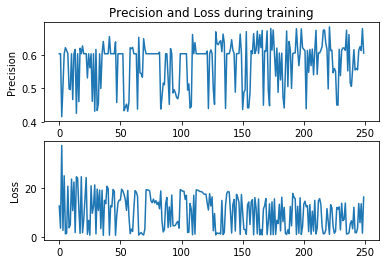

In [18]:
plt.subplot(2, 1, 1)
plt.title('Precision and Loss during training')
plt.plot(prec_conv_2)
plt.ylabel('Precision')
plt.subplot(2, 1, 2)
plt.plot(loss_conv_2)
plt.ylabel('Loss');